In [2]:
import numpy as np 
import cv2 
from matplotlib import pyplot as plt

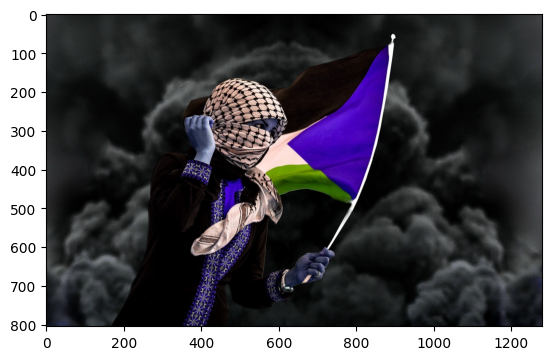

In [3]:
imgnom = cv2.imread('woman-Palestine.jpg') 
plt.imshow(imgnom)

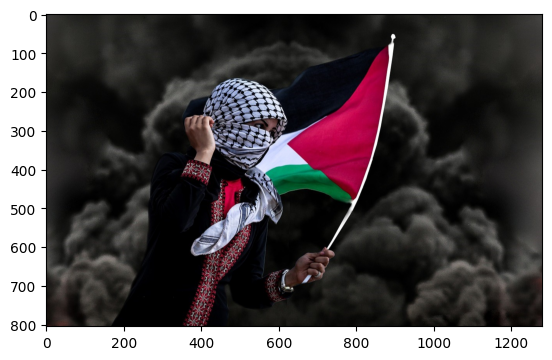

In [4]:
img = cv2.cvtColor(imgnom,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [5]:
mask = np.zeros(img.shape[:2], np.uint8) 

In [6]:
backgroundModel = np.zeros((1, 65), np.float64) 
foregroundModel = np.zeros((1, 65), np.float64)

In [7]:
# Creates two models of the GrabCut algorithm, one for the Foreground and one for the Background
# The model is a matrix of 65 values, each value representing the probability that a pixel in the image belongs to the Foreground or Background.

In [8]:
rectangle = (200, 210, 600, 800)
#According to the dimensions of the image

In [9]:
cv2.grabCut(img, mask, rectangle,   
            backgroundModel, foregroundModel, 
            3, cv2.GC_INIT_WITH_RECT) 

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 3.69127048e-01,  3.21298220e-02,  1.70646579e-01,
          4.04939662e-01,  2.31568898e-02,  3.87255013e+01,
          3.84235684e+01,  3.54854453e+01,  8.03164526e+01,
          8.12354824e+01,  9.18549267e+01,  6.78054274e+01,
          6.57222544e+01,  6.28266920e+01,  1.46717258e+01,
          1.46395151e+01,  1.33184730e+01,  1.65723836e+02,
          2.31795923e+00,  6.17700717e+01,  6.71741262e+01,
          6.77593678e+01,  6.61831250e+01,  6.77593678e+01,
          6.96712059e+01,  6.74626382e+01,  6.61831250e+01,
          6.74626382e+01,  6.78825062e+01,  8.51653264e+03,
          8.43745095e+03,  8.52354318e+03,  8.43745095e+03,
          8.50646829e+03,  8.64207327e+03,  8.52354318e+03,
          8.64207327e+03,  8.89454542e+03,  3.59662498

In [10]:
mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8') 

In [11]:
# The final mask is multiplied with  
# the input image to give the segmented image. 
image = img * mask2[:, :, np.newaxis]

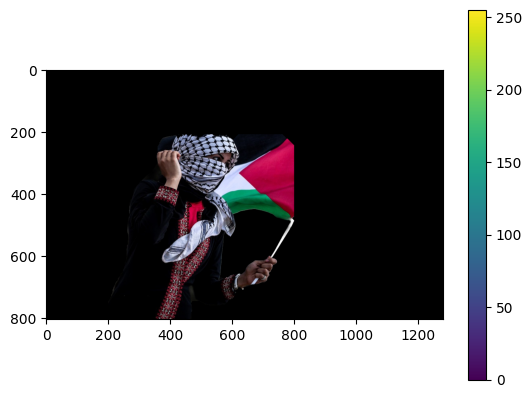

In [12]:
# output segmented image with colorbar 
plt.imshow(image) 
plt.colorbar() 
plt.show()
